<a href="https://colab.research.google.com/github/JananiJayakumar23/JananiJayakumar23/blob/main/Copy_of_Practical_Project_Group_8_Data_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
from scipy.interpolate._bsplines import make_interp_spline

##Importing The Given Datasets

In [ ]:
input_features = pd.read_csv("input_features.csv")
input_features
target_values = pd.read_csv("target_values.csv")
target_values

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2



###Displaying the Datasets

In [ ]:
print("Input Features")
display(input_features.describe())
print("\n")
print("Target Values")
display(target_values.describe())

Input Features


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,1.152780e+05,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.00000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000
mean,5.261840e+05,13.932251,700.443276,6258.481002,2.129322,26.326185,8.012509,5.437508,0.088188,0.762424,0.034257,0.018330,0.067333,0.076121,0.255827,0.085099,0.04255,0.015936,0.014843,0.985383,0.112538,0.065095,0.033996,0.007747,0.000798,0.000338,0.001145,0.000182,0.000104,0.000104,0.004849
std,3.047383e+05,8.018366,412.296979,3650.317429,0.728042,72.233625,4.396638,1.926865,0.283569,0.425600,0.181888,0.134141,0.250600,0.265193,0.436327,0.279031,0.20184,0.125227,0.120923,0.417157,0.316028,0.246695,0.181221,0.087673,0.028239,0.018390,0.033820,0.013496,0.010202,0.010202,0.069467
min,4.000000e+00,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.618805e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.256425e+05,12.000000,700.000000,6262.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.910800e+05,21.000000,1049.000000,9414.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12565.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




Target Values


,building_id,damage_grade
count,2.606010e+05,260601.000000
mean,5.256755e+05,2.238272
std,3.045450e+05,0.611814
min,4.000000e+00,1.000000
25%,2.611900e+05,2.000000
50%,5.257570e+05,2.000000
75%,7.897620e+05,3.000000
max,1.052934e+06,3.000000


##Merging the Datasets

In [ ]:
input_features.shape

(115278, 39)

In [ ]:
target_values.shape

(260601, 2)

In [ ]:
merged_dataset = pd.merge(input_features, target_values)
merged_dataset

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115273,275098,10,70,627,2,25,8,4,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
115274,996374,18,1092,8751,1,5,8,2,t,r,n,f,j,j,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
115275,355710,6,1289,5025,2,0,12,5,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
115276,332956,11,938,10992,3,80,8,10,t,r,n,x,q,s,d,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [ ]:
print("Merged Dataset")
display(merged_dataset.describe())

Merged Dataset


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,1.152780e+05,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.00000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115278.000000
mean,5.261840e+05,13.932251,700.443276,6258.481002,2.129322,26.326185,8.012509,5.437508,0.088188,0.762424,0.034257,0.018330,0.067333,0.076121,0.255827,0.085099,0.04255,0.015936,0.014843,0.985383,0.112538,0.065095,0.033996,0.007747,0.000798,0.000338,0.001145,0.000182,0.000104,0.000104,0.004849,2.238840
std,3.047383e+05,8.018366,412.296979,3650.317429,0.728042,72.233625,4.396638,1.926865,0.283569,0.425600,0.181888,0.134141,0.250600,0.265193,0.436327,0.279031,0.20184,0.125227,0.120923,0.417157,0.316028,0.246695,0.181221,0.087673,0.028239,0.018390,0.033820,0.013496,0.010202,0.010202,0.069467,0.611197
min,4.000000e+00,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.618805e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.256425e+05,12.000000,700.000000,6262.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.910800e+05,21.000000,1049.000000,9414.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12565.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
merged_dataset.shape

(115278, 40)

##Transposed Dataset

In [ ]:
merged_dataset.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,115238,115239,115240,115241,115242,115243,115244,115245,115246,115247,115248,115249,115250,115251,115252,115253,115254,115255,115256,115257,115258,115259,115260,115261,115262,115263,115264,115265,115266,115267,115268,115269,115270,115271,115272,115273,115274,115275,115276,115277
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500,7962,452227,444381,287845,605134,563431,633759,980230,354011,483543,793397,433870,219578,933368,519606,801078,973909,858160,466558,529366,406413,16485,157370,119565,141871,903120,864809,252816,33651,90130,...,584861,638180,870835,904758,368901,881438,66504,559414,1049390,1033932,93852,58975,2641,534742,895649,151580,172728,80267,131232,265960,674388,72085,968919,843321,377611,630168,446002,1052245,459936,695438,343875,1013568,209090,311538,331549,275098,996374,355710,332956,224297
geo_level_1_id,6,8,21,22,11,8,9,20,0,26,17,17,12,17,18,4,6,27,26,8,27,25,10,4,11,21,7,4,3,27,25,20,6,10,18,21,13,17,6,4,...,4,7,26,27,10,1,6,27,4,6,4,6,8,17,26,20,4,7,26,21,10,21,7,30,5,16,9,20,14,10,4,6,4,6,7,10,18,6,11,3
geo_level_2_id,487,900,363,418,131,558,475,323,757,886,1119,1275,335,817,1295,484,706,216,1401,41,216,211,90,1235,660,1051,1328,707,1229,548,843,953,706,405,256,336,305,303,1210,1218,...,450,746,1085,548,661,1169,99,533,972,1108,328,516,640,582,762,261,747,157,39,1219,996,477,773,506,195,1410,230,270,379,417,926,842,707,1253,4,70,1092,1289,938,1387
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994,12188,4004,8167,6284,6994,11114,12267,12323,3904,6024,12323,10587,11215,4976,9780,759,5612,12040,7251,1119,5236,6651,11722,5132,3430,5107,5956,4121,9423,2175,...,1657,95,6016,2513,10803,8874,3837,5800,1352,2852,9969,8770,7843,4226,11844,4123,164,10624,633,2705,8360,11116,10074,6165,12076,5607,8178,12307,9570,9412,2089,4804,9930,9708,10344,627,8751,5025,10992,3795
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1,2,1,2,3,2,2,2,3,1,2,3,2,2,3,2,2,3,2,2,3,2,2,2,2,2,2,2,3,3,2,...,2,3,2,2,2,3,3,3,2,3,2,3,2,3,2,2,2,2,3,2,2,3,2,2,3,2,1,2,2,3,2,3,2,4,2,2,1,2,3,5
age,30,10,10,10,30,10,25,0,15,0,20,10,15,45,25,55,5,10,20,20,40,30,0,25,80,40,10,15,10,60,35,15,20,10,15,25,0,0,40,0,...,35,35,30,10,5,5,30,15,10,10,40,5,10,25,0,5,10,30,5,10,15,20,5,30,65,10,10,10,50,30,10,25,10,80,55,25,5,0,80,30
area_percentage,6,8,5,6,8,9,3,8,8,13,9,8,6,7,7,4,7,7,12,16,7,6,6,6,5,5,11,8,7,27,11,13,4,3,7,5,9,10,5,9,...,4,5,7,4,6,21,14,13,6,9,4,11,6,5,9,8,8,5,28,5,5,15,8,5,11,7,11,8,8,7,5,11,7,5,9,8,8,12,8,14
height_percentage,5,7,5,5,9,5,4,6,6,4,6,4,5,7,6,4,5,7,3,4,5,5,5,6,5,5,5,5,6,10,5,5,4,6,5,4,8,7,7,4,...,6,7,4,5,5,9,7,9,6,10,4,5,5,6,6,6,5,5,9,3,5,7,5,4,6,5,3,5,5,6,4,6,6,8,4,4,2,5,10,11
land_surface_condition,t,o,t,t,t,t,n,t,t,t,t,t,t,t,t,n,t,t,t,t,t,t,t,n,t,t,t,n,t,t,t,t,t,t,t,t,t,t,t,t,...,t,t,t,t,t,t,t,t,n,t,n,t,t,n,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i,r,u,r,r,r,r,r,r,u,r,r,r,r,r,r,r,r,u,r,r,r,w,r,r,h,r,r,r,r,r,...,r,u,r,r,r,i,r,r,r,r,r,r,r,r,r,w,u,r,i,r,r,r,h,r,r,r,i,r,r,r,r,r,r,r,r,r,r,r,r,r


##Sorted Dataset

In [ ]:
d1 = merged_dataset.sort_values("geo_level_2_id", ascending = False)
display(d1)
d2 = d1.sort_values("geo_level_1_id", ascending = True)
display(d2)
d3 = d2.sort_values("geo_level_3_id", ascending = False)
display(d3)
d4 = merged_dataset.sort_values("building_id", ascending = True)
d4

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
9114,830457,23,1427,222,2,35,10,6,o,u,n,f,q,t,d,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
71895,631163,23,1427,6234,1,10,9,3,o,r,n,f,j,t,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
83957,97398,23,1427,8766,2,15,10,6,n,r,n,f,q,t,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
67925,99100,23,1427,4829,2,15,13,5,n,r,n,f,q,t,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
37007,294038,23,1427,222,2,20,11,6,o,r,n,f,q,t,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92147,752415,18,0,2439,2,60,31,6,t,r,n,f,x,j,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
70088,33596,18,0,9045,1,0,13,3,t,i,n,z,j,s,d,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
19991,893951,18,0,9045,2,45,30,6,t,i,n,z,x,s,d,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,v,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
42505,445810,18,0,1295,2,50,20,6,t,r,n,f,x,s,d,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
67477,20237,0,757,4500,2,15,14,5,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,v,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
76767,386488,0,793,3220,3,0,8,8,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
76668,39389,0,279,5356,2,10,7,5,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
100181,942310,0,279,5356,2,0,8,5,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
57310,249564,0,279,5356,2,10,7,5,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,305190,30,102,12374,2,20,9,5,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
45718,15591,30,102,3179,2,20,9,6,t,r,n,f,q,t,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
86590,737133,30,102,4280,2,0,6,4,o,r,n,v,q,t,d,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99079,558171,30,102,10317,2,55,9,4,t,r,n,x,q,t,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
51032,278352,1,1386,12565,2,20,5,5,t,r,q,f,q,t,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
47043,519182,1,1386,12565,2,20,5,5,t,r,q,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
25485,882108,5,133,12564,2,50,17,6,t,r,n,f,x,s,d,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
14948,635781,5,133,12564,2,20,15,6,t,r,n,f,x,s,d,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
35232,223203,5,133,12564,2,30,19,6,t,r,n,f,x,s,d,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34575,23613,1,14,5,2,25,7,4,t,r,q,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
96185,545466,1,14,5,2,40,6,4,t,r,q,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
112589,743528,30,73,3,1,20,5,3,t,u,n,v,j,s,d,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3232,106638,30,73,3,2,5,15,6,t,i,x,v,s,o,d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,v,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
47748,4,30,266,1224,1,25,5,2,t,r,n,f,j,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
60133,12,17,716,7056,2,5,12,6,o,r,q,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
34181,16,4,651,105,2,80,5,4,n,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
25045,17,3,1387,3909,5,40,5,10,t,r,n,f,q,o,d,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
33426,31,6,398,4512,2,30,10,5,t,r,n,f,q,t,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58237,1052911,8,597,11842,3,0,6,6,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
73193,1052921,4,1235,4976,3,25,9,7,t,r,q,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
79815,1052926,20,1359,1810,2,5,7,5,t,r,n,f,x,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
79795,1052929,17,303,9803,3,55,10,6,t,r,q,x,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


##Datatype Change

In [ ]:
merged_dataset.dtypes

building_id                                 int64
geo_level_1_id                              int64
geo_level_2_id                              int64
geo_level_3_id                              int64
count_floors_pre_eq                         int64
age                                         int64
area_percentage                             int64
height_percentage                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud              float64
has_superstructure_mud_mortar_stone       float64
has_superstructure_stone_flag             float64
has_superstructure_cement_mortar_stone    float64
has_superstructure_mud_mortar_brick       float64


In [ ]:
df1 = merged_dataset.astype({'geo_level_1_id' : 'int32', 'damage_grade' : 'int32',
                             'age' : 'int32', 'has_superstructure_cement_mortar_brick' : 'int32'}).dtypes
display(df1)

ValueError: ignored

###Changing Dtype From object to categorical

In [ ]:
df1.astype('category')

NameError: ignored

##Data Deletion

In [ ]:
del_dataset = merged_dataset.drop(["geo_level_1_id", "has_secondary_use", "foundation_type", "position", "has_superstructure_adobe_mud"], axis = 1)
del_dataset

,building_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,roof_type,ground_floor_type,other_floor_type,plan_configuration,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,487,12198,2,30,6,5,t,n,f,q,d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,28830,900,2812,2,10,8,7,o,n,x,q,d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,94947,363,8973,2,10,5,5,t,n,f,x,d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,590882,418,10694,2,10,6,5,t,n,f,x,d,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,201944,131,1488,3,30,8,9,t,n,f,x,d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115273,275098,70,627,2,25,8,4,t,n,f,q,d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
115274,996374,1092,8751,1,5,8,2,t,n,f,j,d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
115275,355710,1289,5025,2,0,12,5,t,n,f,q,d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
115276,332956,938,10992,3,80,8,10,t,n,x,q,d,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


##Trends in Data

In [ ]:
m = d4.head(10)
display(m)
m1 = merged_dataset.head(10)
display(m1)
m2 = m1.sort_values('geo_level_1_id', ascending = True)
display(m2)
m3 = m1.sort_values('geo_level_2_id', ascending = True)
display(m3)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
47748,4,30,266,1224,1,25,5,2,t,r,n,f,j,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
60133,12,17,716,7056,2,5,12,6,o,r,q,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
34181,16,4,651,105,2,80,5,4,n,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
25045,17,3,1387,3909,5,40,5,10,t,r,n,f,q,o,d,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
33426,31,6,398,4512,2,30,10,5,t,r,n,f,q,t,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
50540,40,10,1174,9536,2,20,5,5,t,r,q,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
45235,42,10,803,5136,2,15,5,5,t,r,n,x,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
113045,46,21,935,9689,2,0,7,4,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
106730,60,6,376,10236,1,5,8,3,t,u,x,v,j,t,d,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,v,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
100198,61,27,1394,4186,2,40,6,6,t,r,n,f,x,s,d,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


###Smoothing a Line Graph of No of Buildings in Geo Level 2

Normal Graph


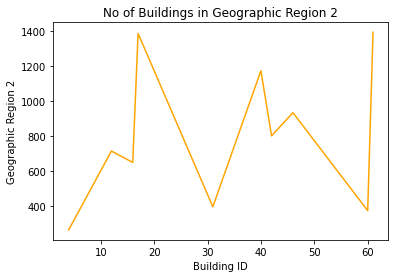



Smoothened Graph


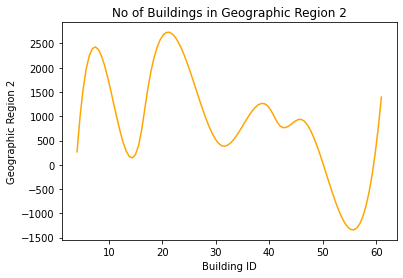

In [ ]:
x = m.building_id
y = m.geo_level_2_id
plt.plot(x,y, color = 'orange')
plt.title("No of Buildings in Geographic Region 2")
plt.xlabel("Building ID")
plt.ylabel("Geographic Region 2")
print("Normal Graph")
plt.show()
print("\n")

X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 100)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_, color = 'orange')
plt.title("No of Buildings in Geographic Region 2")
plt.xlabel("Building ID")
plt.ylabel("Geographic Region 2")
print("Smoothened Graph")
plt.show()

###Smoothing a Scatter Plot of Geo Level 2 vs Geo Level 3

Normal Graph


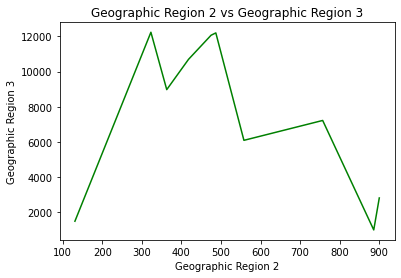



Smoothened Graph


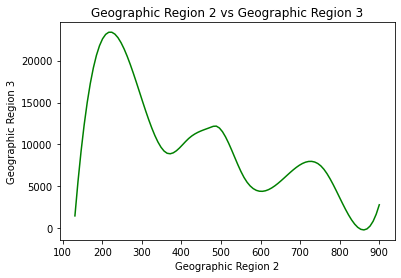

In [ ]:
#Scatter Plot
x2 = m3.geo_level_2_id
y2 = m3.geo_level_3_id
plt.plot(x2,y2, color = 'Green')
plt.title("Geographic Region 2 vs Geographic Region 3")
plt.xlabel("Geographic Region 2")
plt.ylabel("Geographic Region 3")
print("Normal Graph")
plt.show()
print("\n")

#Smoothened Graph
X_Y_Spline = make_interp_spline(x2, y2)
X_ = np.linspace(x2.min(), x2.max(), 100)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_, color = 'Green')
plt.title("Geographic Region 2 vs Geographic Region 3")
plt.xlabel("Geographic Region 2")
plt.ylabel("Geographic Region 3")
print("Smoothened Graph")
plt.show()

##Quality of Data - Descriptive Statistics(Mean, Median, Mode, SD)

###Frequency Count

In [ ]:
target_values.count()

building_id     260601
damage_grade    260601
dtype: int64

In [ ]:
input_features.count()

building_id                               115278
geo_level_1_id                            115278
geo_level_2_id                            115278
geo_level_3_id                            115278
count_floors_pre_eq                       115278
age                                       115278
area_percentage                           115278
height_percentage                         115278
land_surface_condition                    115278
foundation_type                           115278
roof_type                                 115278
ground_floor_type                         115278
other_floor_type                          115278
position                                  115278
plan_configuration                        115278
has_superstructure_adobe_mud              115277
has_superstructure_mud_mortar_stone       115277
has_superstructure_stone_flag             115277
has_superstructure_cement_mortar_stone    115277
has_superstructure_mud_mortar_brick       115277
has_superstructure_c

In [ ]:
merged_dataset.count()

building_id                               115278
geo_level_1_id                            115278
geo_level_2_id                            115278
geo_level_3_id                            115278
count_floors_pre_eq                       115278
age                                       115278
area_percentage                           115278
height_percentage                         115278
land_surface_condition                    115278
foundation_type                           115278
roof_type                                 115278
ground_floor_type                         115278
other_floor_type                          115278
position                                  115278
plan_configuration                        115278
has_superstructure_adobe_mud              115277
has_superstructure_mud_mortar_stone       115277
has_superstructure_stone_flag             115277
has_superstructure_cement_mortar_stone    115277
has_superstructure_mud_mortar_brick       115277
has_superstructure_c

###Descriptive Statistics- Mean, Median, Mode

In [ ]:
input_features.mean()

building_id                               526183.953721
geo_level_1_id                                13.932251
geo_level_2_id                               700.443276
geo_level_3_id                              6258.481002
count_floors_pre_eq                            2.129322
age                                           26.326185
area_percentage                                8.012509
height_percentage                              5.437508
has_superstructure_adobe_mud                   0.088188
has_superstructure_mud_mortar_stone            0.762424
has_superstructure_stone_flag                  0.034257
has_superstructure_cement_mortar_stone         0.018330
has_superstructure_mud_mortar_brick            0.067333
has_superstructure_cement_mortar_brick         0.076121
has_superstructure_timber                      0.255827
has_superstructure_bamboo                      0.085099
has_superstructure_rc_non_engineered           0.042550
has_superstructure_rc_engineered               0

In [ ]:
input_features.median()

building_id                               525642.5
geo_level_1_id                                12.0
geo_level_2_id                               700.0
geo_level_3_id                              6262.0
count_floors_pre_eq                            2.0
age                                           15.0
area_percentage                                7.0
height_percentage                              5.0
has_superstructure_adobe_mud                   0.0
has_superstructure_mud_mortar_stone            1.0
has_superstructure_stone_flag                  0.0
has_superstructure_cement_mortar_stone         0.0
has_superstructure_mud_mortar_brick            0.0
has_superstructure_cement_mortar_brick         0.0
has_superstructure_timber                      0.0
has_superstructure_bamboo                      0.0
has_superstructure_rc_non_engineered           0.0
has_superstructure_rc_engineered               0.0
has_superstructure_other                       0.0
count_families                 

In [ ]:
input_features.mode()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,4,6.0,39.0,9133.0,2.0,10.0,6.0,5.0,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115273,1052911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115274,1052921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115275,1052926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115276,1052929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
input_features.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,1.152780e+05,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.00000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000
mean,5.261840e+05,13.932251,700.443276,6258.481002,2.129322,26.326185,8.012509,5.437508,0.088188,0.762424,0.034257,0.018330,0.067333,0.076121,0.255827,0.085099,0.04255,0.015936,0.014843,0.985383,0.112538,0.065095,0.033996,0.007747,0.000798,0.000338,0.001145,0.000182,0.000104,0.000104,0.004849
std,3.047383e+05,8.018366,412.296979,3650.317429,0.728042,72.233625,4.396638,1.926865,0.283569,0.425600,0.181888,0.134141,0.250600,0.265193,0.436327,0.279031,0.20184,0.125227,0.120923,0.417157,0.316028,0.246695,0.181221,0.087673,0.028239,0.018390,0.033820,0.013496,0.010202,0.010202,0.069467
min,4.000000e+00,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.618805e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.256425e+05,12.000000,700.000000,6262.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.910800e+05,21.000000,1049.000000,9414.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12565.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
target_values.mean()

building_id     525675.482773
damage_grade         2.238272
dtype: float64

In [ ]:
target_values.median()

building_id     525757.0
damage_grade         2.0
dtype: float64

In [ ]:
target_values.mode()

,building_id,damage_grade
0,4,2.0
1,8,NaN
2,12,NaN
3,16,NaN
4,17,NaN
...,...,...
260596,1052921,NaN
260597,1052926,NaN
260598,1052929,NaN
260599,1052931,NaN


In [ ]:
target_values.describe()

,building_id,damage_grade
count,2.606010e+05,260601.000000
mean,5.256755e+05,2.238272
std,3.045450e+05,0.611814
min,4.000000e+00,1.000000
25%,2.611900e+05,2.000000
50%,5.257570e+05,2.000000
75%,7.897620e+05,3.000000
max,1.052934e+06,3.000000


In [ ]:
merged_dataset.mean()

building_id                               526183.953721
geo_level_1_id                                13.932251
geo_level_2_id                               700.443276
geo_level_3_id                              6258.481002
count_floors_pre_eq                            2.129322
age                                           26.326185
area_percentage                                8.012509
height_percentage                              5.437508
has_superstructure_adobe_mud                   0.088188
has_superstructure_mud_mortar_stone            0.762424
has_superstructure_stone_flag                  0.034257
has_superstructure_cement_mortar_stone         0.018330
has_superstructure_mud_mortar_brick            0.067333
has_superstructure_cement_mortar_brick         0.076121
has_superstructure_timber                      0.255827
has_superstructure_bamboo                      0.085099
has_superstructure_rc_non_engineered           0.042550
has_superstructure_rc_engineered               0

In [ ]:
merged_dataset.median()

building_id                               525642.5
geo_level_1_id                                12.0
geo_level_2_id                               700.0
geo_level_3_id                              6262.0
count_floors_pre_eq                            2.0
age                                           15.0
area_percentage                                7.0
height_percentage                              5.0
has_superstructure_adobe_mud                   0.0
has_superstructure_mud_mortar_stone            1.0
has_superstructure_stone_flag                  0.0
has_superstructure_cement_mortar_stone         0.0
has_superstructure_mud_mortar_brick            0.0
has_superstructure_cement_mortar_brick         0.0
has_superstructure_timber                      0.0
has_superstructure_bamboo                      0.0
has_superstructure_rc_non_engineered           0.0
has_superstructure_rc_engineered               0.0
has_superstructure_other                       0.0
count_families                 

In [ ]:
merged_dataset.mode()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,4,6.0,39.0,9133.0,2.0,10.0,6.0,5.0,t,r,n,f,q,s,d,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115273,1052911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115274,1052921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115275,1052926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115276,1052929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Normality - Frequency Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d2591d9d0>,
      dtype=object)

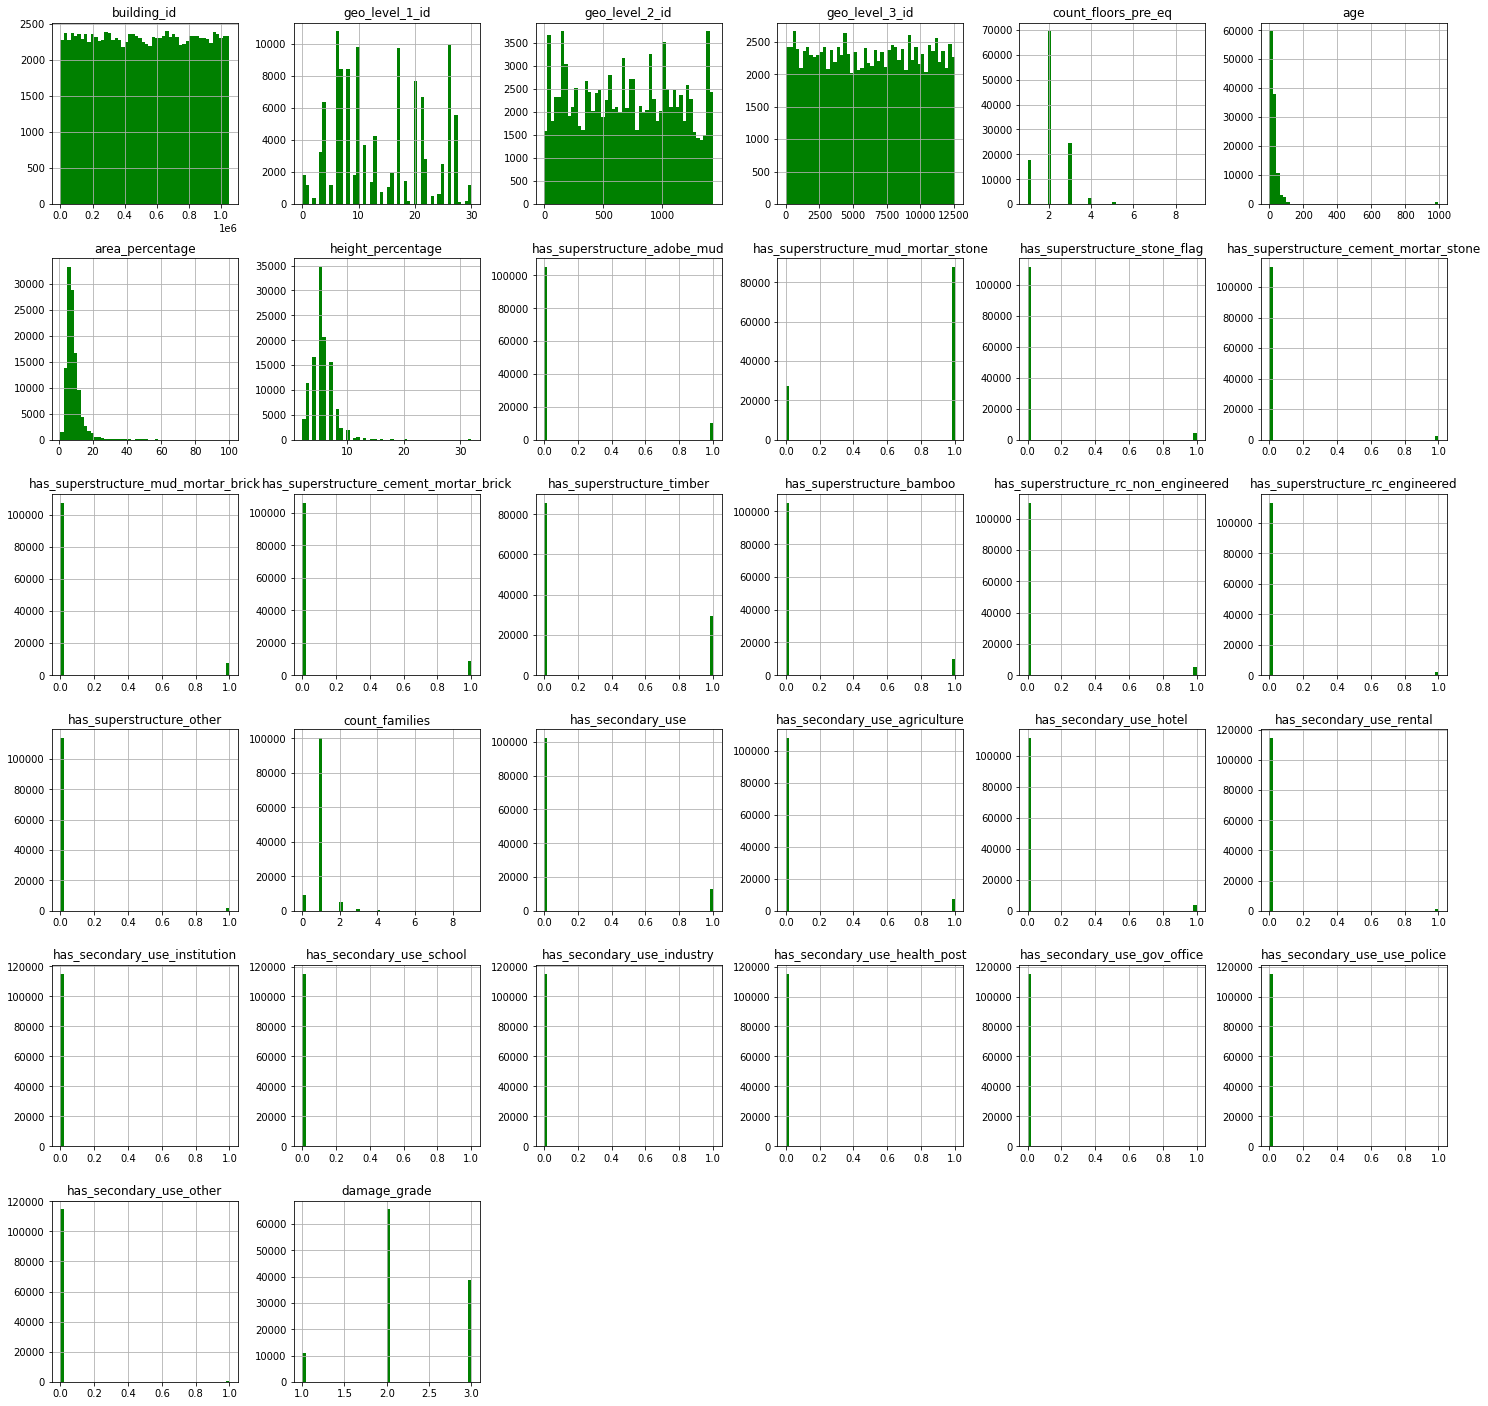

In [ ]:
merged_dataset.hist(bins=50,figsize=(25,25),color="Green")

In [ ]:
merged_dataset.groupby(['damage_grade']).count()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
damage_grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053,11053
2,65639,65639,65639,65639,65639,65639,65639,65639,65639,65639,65639,65639,65639,65639,65639,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638,65638
3,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586,38586


##Number of Missing Values

In [ ]:
merged_dataset.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       1
has_superstructure_stone_flag             1
has_superstructure_cement_mortar_stone    1
has_superstructure_mud_mortar_brick       1
has_superstructure_cement_mortar_brick    1
has_superstructure_timber                 1
has_superstructure_bamboo       

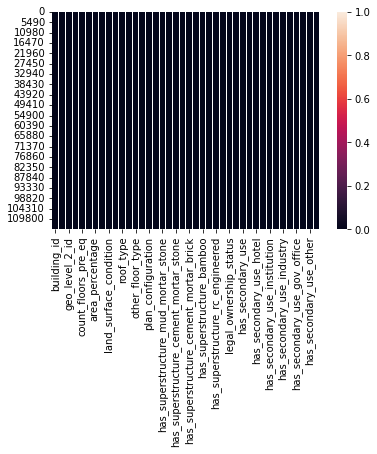

In [ ]:
import seaborn as sns
sns.heatmap(merged_dataset.isna())

##Missing Data - Null values

In [ ]:
null_mask = merged_dataset['has_superstructure_adobe_mud'].isnull()
merged_dataset[null_mask]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade


In [ ]:
null_mask = merged_dataset['has_superstructure_mud_mortar_stone'].isnull()
merged_dataset[null_mask]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
115277,224297,3,1387,3795,5,30,14,11,t,r,n,f,q,j,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
null_mask = merged_dataset['has_secondary_use_other'].isnull()
merged_dataset[null_mask]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
115277,224297,3,1387,3795,5,30,14,11,t,r,n,f,q,j,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
merged_dataset.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,1.152780e+05,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115278.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.00000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115277.000000,115278.000000
mean,5.261840e+05,13.932251,700.443276,6258.481002,2.129322,26.326185,8.012509,5.437508,0.088188,0.762424,0.034257,0.018330,0.067333,0.076121,0.255827,0.085099,0.04255,0.015936,0.014843,0.985383,0.112538,0.065095,0.033996,0.007747,0.000798,0.000338,0.001145,0.000182,0.000104,0.000104,0.004849,2.238840
std,3.047383e+05,8.018366,412.296979,3650.317429,0.728042,72.233625,4.396638,1.926865,0.283569,0.425600,0.181888,0.134141,0.250600,0.265193,0.436327,0.279031,0.20184,0.125227,0.120923,0.417157,0.316028,0.246695,0.181221,0.087673,0.028239,0.018390,0.033820,0.013496,0.010202,0.010202,0.069467,0.611197
min,4.000000e+00,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.618805e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.256425e+05,12.000000,700.000000,6262.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.910800e+05,21.000000,1049.000000,9414.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12565.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
